In [2]:
#-----------------------------------------------------------------------------------------
# Name:        Day 73 - 100 Days of Code
# Title:       Advanced - Data Visualization with Matplotlib: Programming Languages
#
# Author:      Erick Rico
# Created:     05/08/2025
#-----------------------------------------------------------------------------------------

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv("QueryResults.csv")

# df = pd.read_csv("QueryResults.csv", name=("DATE", "TAG", "POSTS"), header=0)

Inspección y manipulación inicial extra:

In [5]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [6]:
df = df.rename(columns = {
    "m": "DATE",
    "TagName": "TAG",
    "Unnamed: 2": "POSTS",
})

df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2826,2025-07-01 00:00:00,php,145
2827,2025-07-01 00:00:00,python,1139
2828,2025-07-01 00:00:00,r,250
2829,2025-07-01 00:00:00,ruby,17


In [7]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2831 non-null   datetime64[ns]
 1   TAG     2831 non-null   object        
 2   POSTS   2831 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 66.5+ KB


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [9]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


In [10]:
df.tail()

,DATE,TAG,POSTS
2826,2025-07-01,php,145
2827,2025-07-01,python,1139
2828,2025-07-01,r,250
2829,2025-07-01,ruby,17
2830,2025-07-01,swift,178


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [11]:
df.shape

(2831, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
df.count()

DATE     2831
TAG      2831
POSTS    2831
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [13]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [14]:
df.groupby("TAG")["POSTS"].sum().sort_values(ascending=False)

TAG
javascript    2528840
python        2210216
java          1918996
c#            1624328
php           1465701
c++            814675
r              510868
c              408018
swift          336266
ruby           229309
go              74410
perl            68354
delphi          52512
assembly        45142
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [15]:
df["DATE"].head(50)

0    2008-07-01
1    2008-08-01
2    2008-08-01
3    2008-08-01
4    2008-08-01
5    2008-08-01
6    2008-08-01
7    2008-08-01
8    2008-08-01
9    2008-08-01
10   2008-08-01
11   2008-08-01
12   2008-09-01
13   2008-09-01
14   2008-09-01
15   2008-09-01
16   2008-09-01
17   2008-09-01
18   2008-09-01
19   2008-09-01
20   2008-09-01
21   2008-09-01
22   2008-09-01
23   2008-09-01
24   2008-10-01
25   2008-10-01
26   2008-10-01
27   2008-10-01
28   2008-10-01
29   2008-10-01
30   2008-10-01
31   2008-10-01
32   2008-10-01
33   2008-10-01
34   2008-10-01
35   2008-11-01
36   2008-11-01
37   2008-11-01
38   2008-11-01
39   2008-11-01
40   2008-11-01
41   2008-11-01
42   2008-11-01
43   2008-11-01
44   2008-11-01
45   2008-11-01
46   2008-11-01
47   2008-12-01
48   2008-12-01
49   2008-12-01
Name: DATE, dtype: datetime64[ns]

In [16]:
df.groupby("TAG")["POSTS"].count()

TAG
assembly      204
c             204
c#            205
c++           204
delphi        204
go            189
java          204
javascript    204
perl          204
php           204
python        204
r             202
ruby          204
swift         195
Name: POSTS, dtype: int64

In [17]:
df.groupby("TAG")["DATE"].nunique().sort_values()
    

TAG
go            189
swift         195
r             202
assembly      204
java          204
delphi        204
c++           204
c             204
python        204
javascript    204
php           204
perl          204
ruby          204
c#            205
Name: DATE, dtype: int64

In [18]:
df.groupby("TAG")["DATE"].nunique().sort_values().head(1)

TAG
go    189
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [19]:
df["DATE"][1]

Timestamp('2008-08-01 00:00:00')

In [20]:
type(df["DATE"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
# ya había convertido a tipo fecha más arriba

## Data Manipulation



In [22]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu',],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


In [23]:
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [24]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1143.0,720.0,128.0,603.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,59.0,307.0,911.0,679.0,53.0,97.0,884.0,1113.0,16.0,331.0,2196.0,484.0,46.0,294.0
2025-04-01,49.0,203.0,644.0,510.0,37.0,64.0,781.0,782.0,15.0,250.0,1706.0,399.0,31.0,215.0
2025-05-01,34.0,204.0,542.0,454.0,35.0,55.0,606.0,635.0,16.0,241.0,1421.0,294.0,28.0,192.0


In [25]:
reshaped_df.shape

(205, 14)

In [26]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [27]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1143.0,720.0,128.0,603.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [28]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2025-03-01,59.0,307.0,911.0,679.0,53.0,97.0,884.0,1113.0,16.0,331.0,2196.0,484.0,46.0,294.0
2025-04-01,49.0,203.0,644.0,510.0,37.0,64.0,781.0,782.0,15.0,250.0,1706.0,399.0,31.0,215.0
2025-05-01,34.0,204.0,542.0,454.0,35.0,55.0,606.0,635.0,16.0,241.0,1421.0,294.0,28.0,192.0
2025-06-01,38.0,178.0,460.0,409.0,32.0,49.0,426.0,487.0,15.0,172.0,1084.0,263.0,28.0,145.0
2025-07-01,39.0,164.0,470.0,395.0,33.0,27.0,449.0,528.0,19.0,145.0,1139.0,250.0,17.0,178.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [29]:
reshaped_df.count()

TAG
assembly      204
c             204
c#            205
c++           204
delphi        204
go            189
java          204
javascript    204
perl          204
php           204
python        204
r             202
ruby          204
swift         195
dtype: int64

In [30]:
reshaped_df.fillna(0, inplace=True)

In [31]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1638.0,752.0,104.0,0.0,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1982.0,804.0,112.0,0.0,1143.0,720.0,128.0,603.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1728.0,733.0,139.0,0.0,951.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [32]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

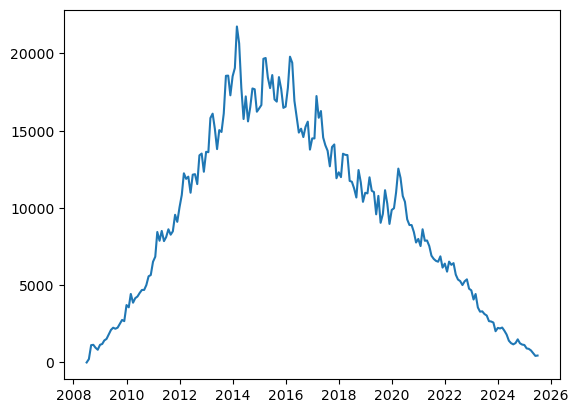

In [33]:
plt.plot(reshaped_df.index,reshaped_df["java"])

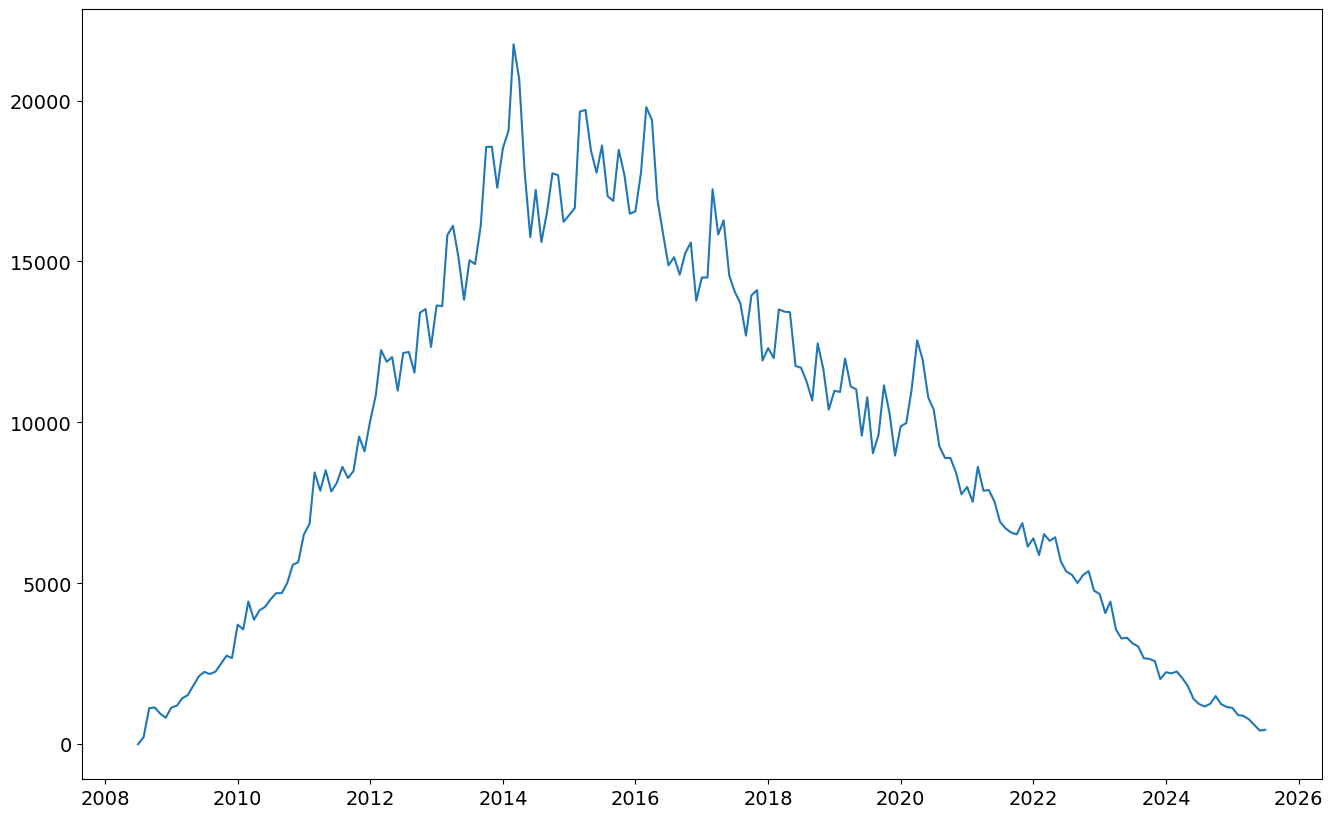

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df["java"])

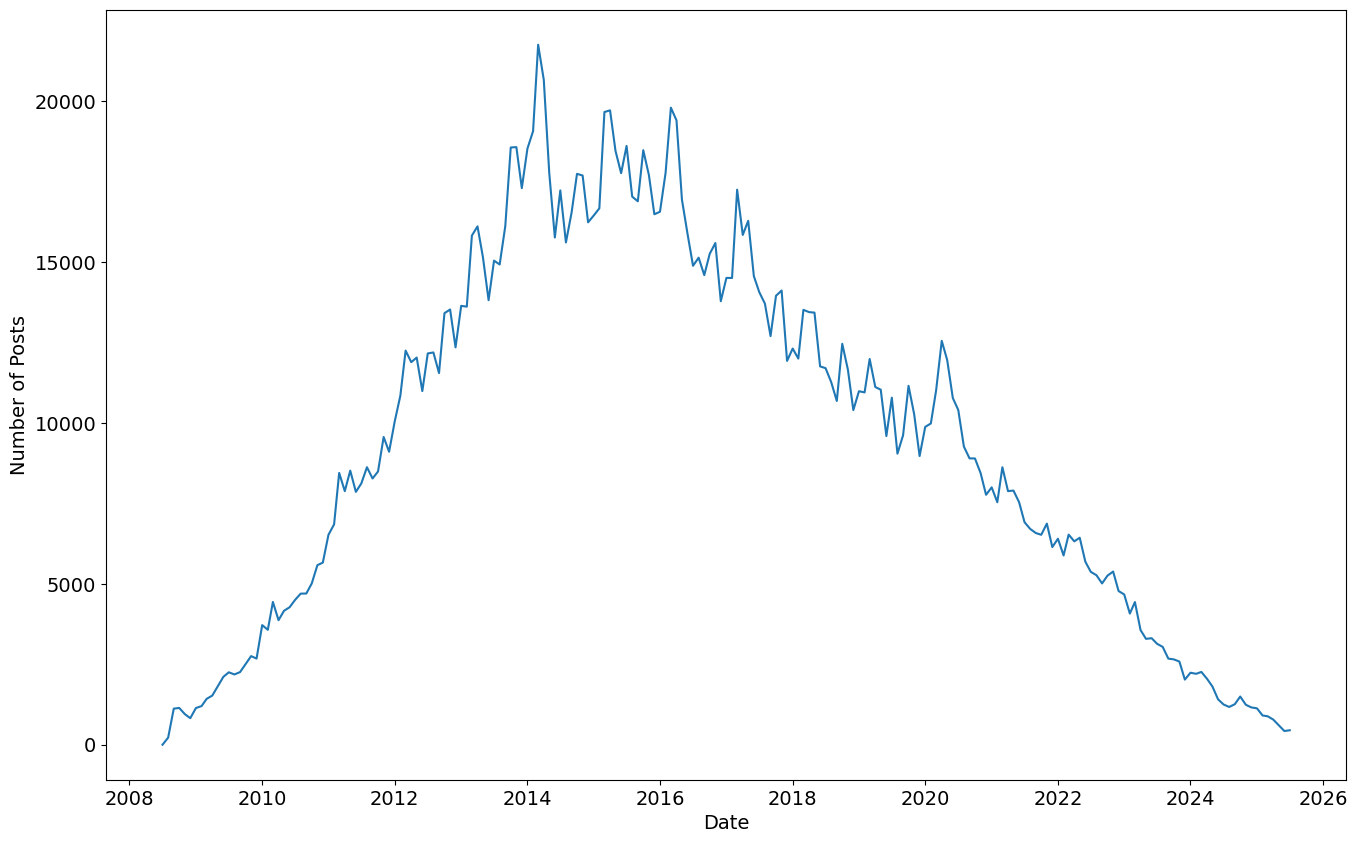

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.plot(reshaped_df.index,reshaped_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

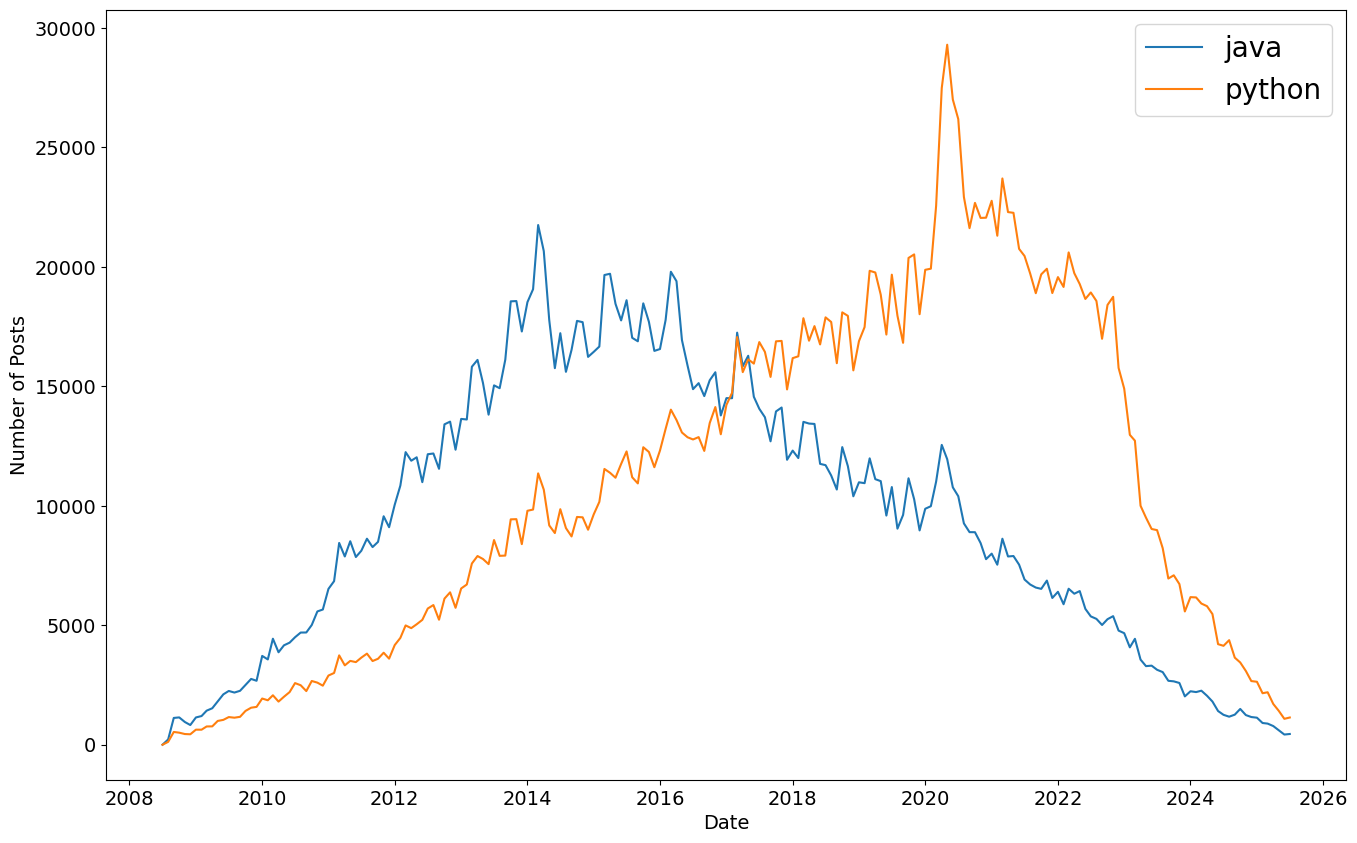

In [36]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.plot(reshaped_df.index, reshaped_df[["java", "python"]])
plt.legend(["java", "python"], loc="best", fontsize=20)

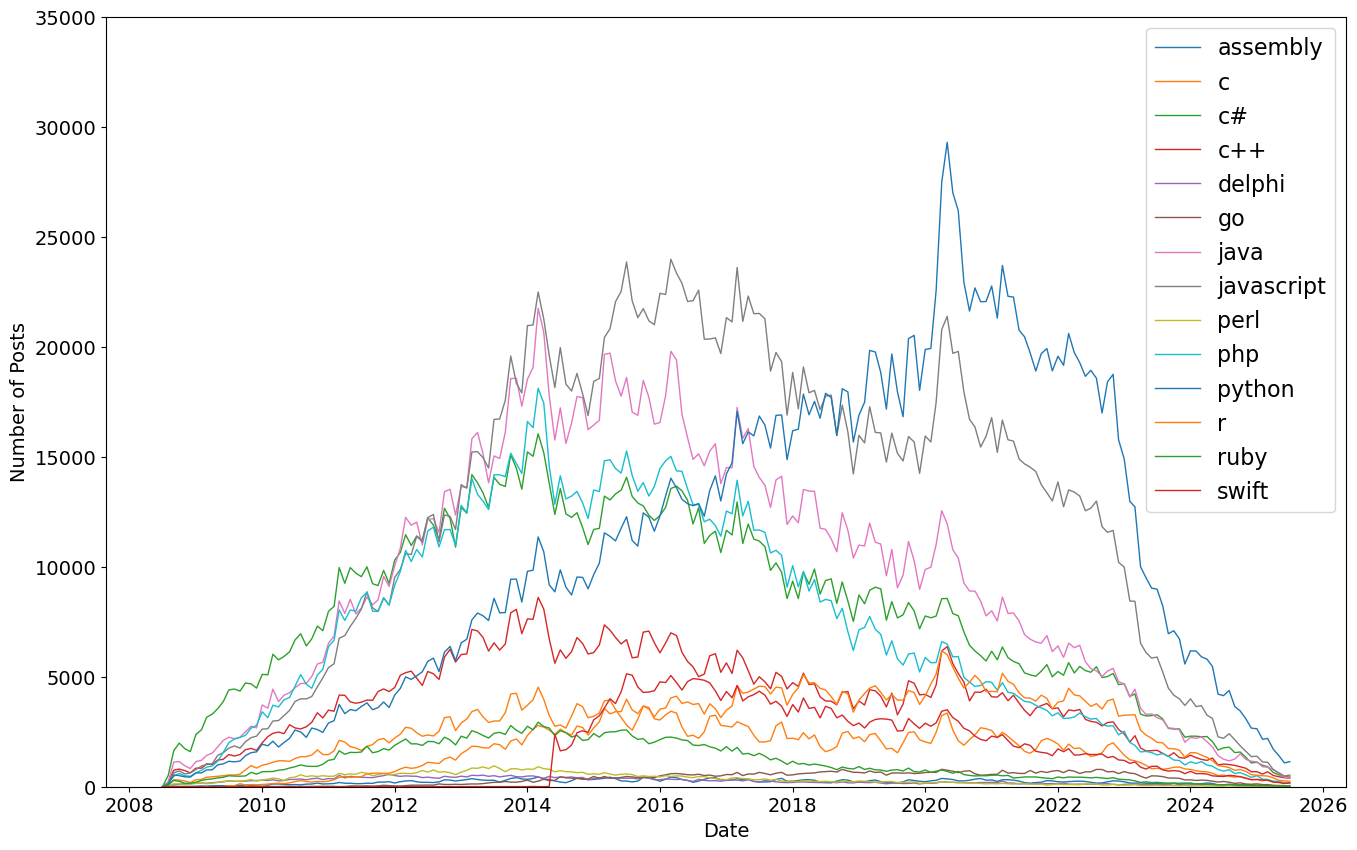

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], lw=1, label=column)

plt.legend(fontsize=16)



# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [38]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [ ]:
# Verificando que la frecuencia de las fechas es mensual
print(df["DATE"].head(35))
df["DATE"].diff().value_counts()

0    2008-07-01
1    2008-08-01
2    2008-08-01
3    2008-08-01
4    2008-08-01
5    2008-08-01
6    2008-08-01
7    2008-08-01
8    2008-08-01
9    2008-08-01
10   2008-08-01
11   2008-08-01
12   2008-09-01
13   2008-09-01
14   2008-09-01
15   2008-09-01
16   2008-09-01
17   2008-09-01
18   2008-09-01
19   2008-09-01
20   2008-09-01
21   2008-09-01
22   2008-09-01
23   2008-09-01
24   2008-10-01
25   2008-10-01
26   2008-10-01
27   2008-10-01
28   2008-10-01
29   2008-10-01
30   2008-10-01
31   2008-10-01
32   2008-10-01
33   2008-10-01
34   2008-10-01
Name: DATE, dtype: datetime64[ns]


DATE
0 days     2626
31 days     119
30 days      68
28 days      13
29 days       4
Name: count, dtype: int64

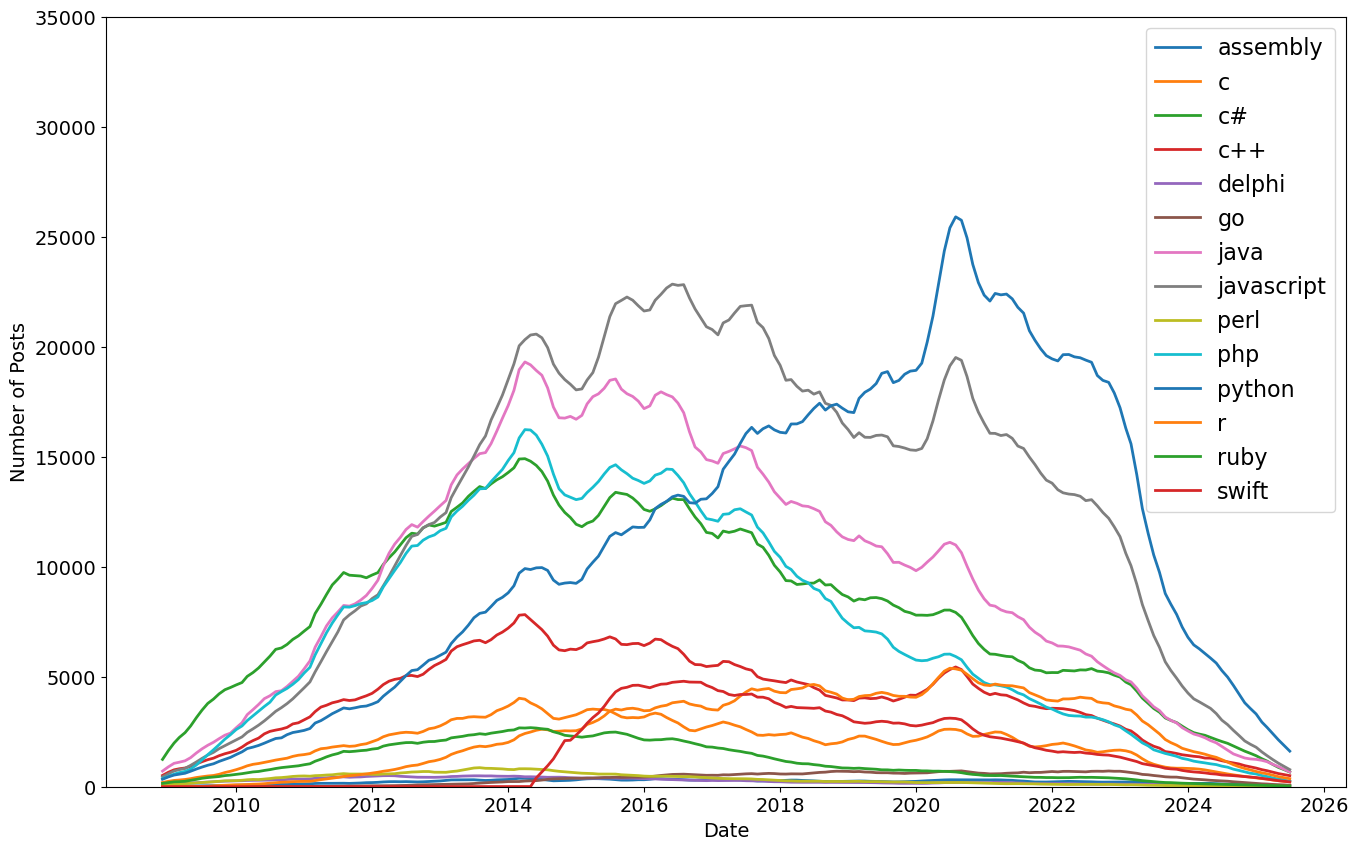

In [40]:
# Por semestre

# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], lw=2, label=column)
 
plt.legend(fontsize=16)

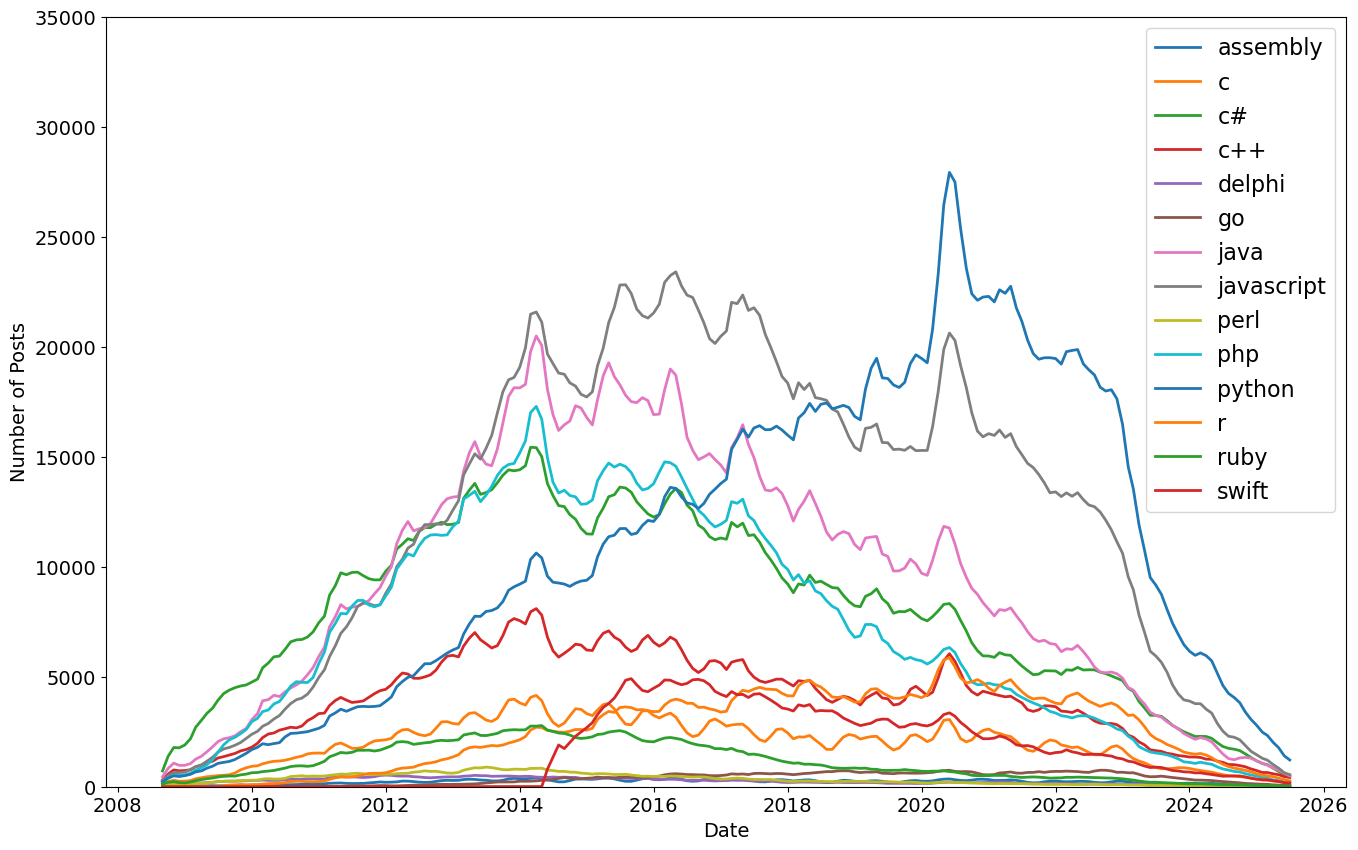

In [41]:
# Por trimestre

roll_df = reshaped_df.rolling(window=3).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], lw=2, label=column)
 
plt.legend(fontsize=16)

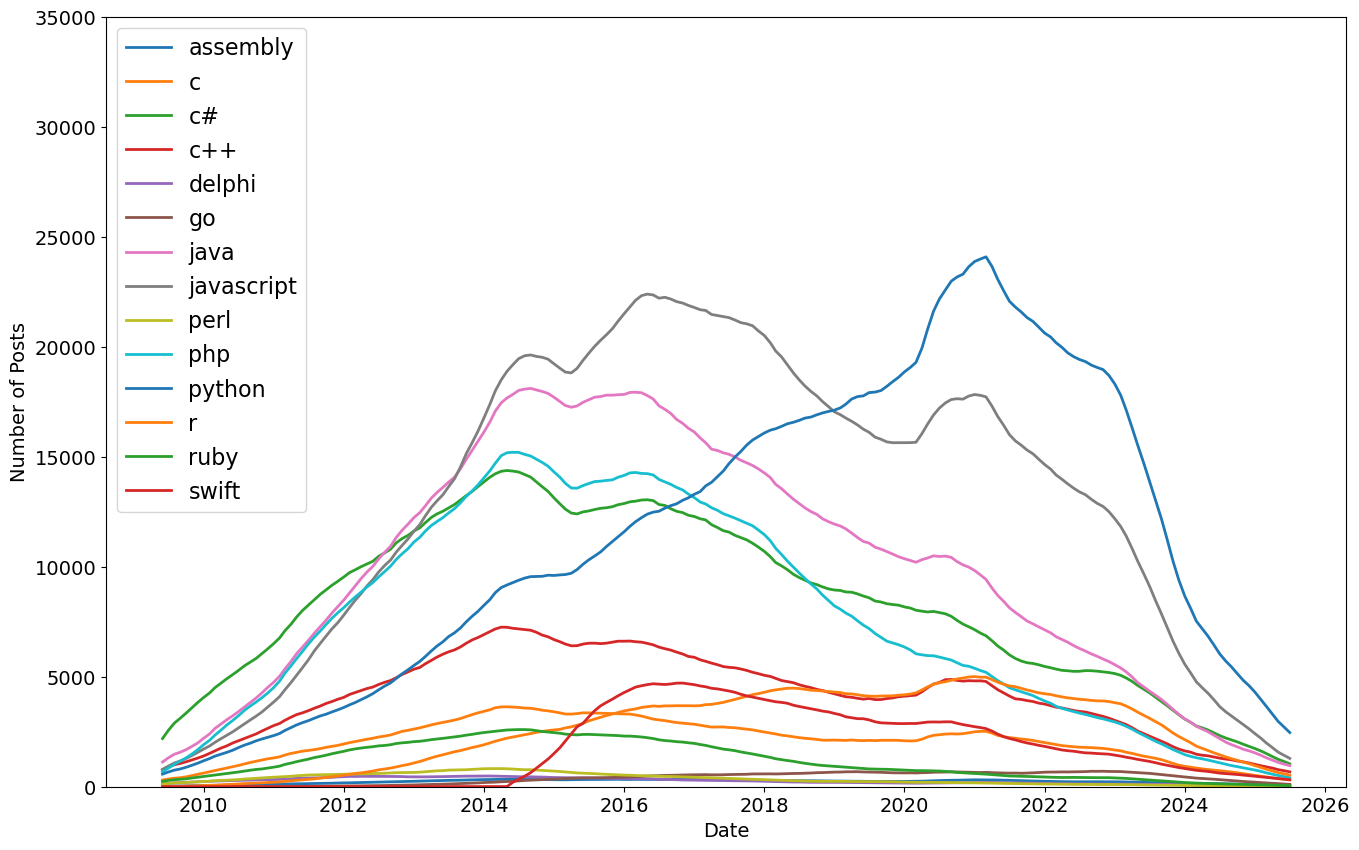

In [42]:
# Por año

roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], lw=2, label=column)
 
plt.legend(fontsize=16)

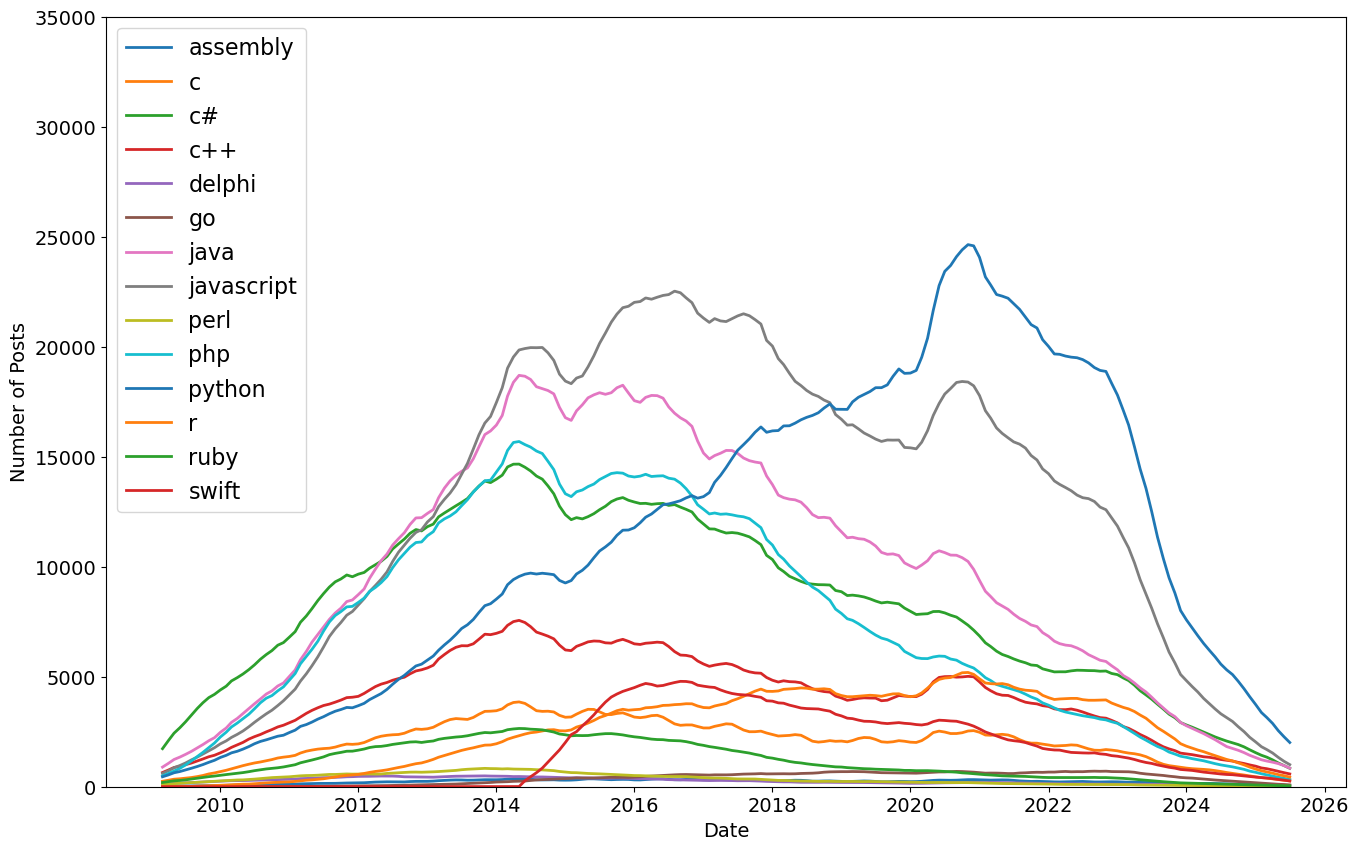

In [43]:
# Cada 9 meses

roll_df = reshaped_df.rolling(window=9).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], lw=2, label=column)
 
plt.legend(fontsize=16)